In [1]:
import stata_setup, os
if os.name == 'nt':
    stata_setup.config('C:/Program Files/Stata17/','mp')
else:
    stata_setup.config('/usr/local/stata17','mp')


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 4-core  perpetual
Serial number: 501706303466
  Licensed to: David Tomas Jacho-Chavez
               Emory University

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


In [2]:
%%stata -eret steret
use ../Data/breathe, clear
quietly do ../Do/no2
quietly lasso linear react no2_class $cc i.($fc), lambda(5) nolog
estimates store lasso
ereturn display


. use ../Data/breathe, clear
(Nitrogen dioxide and attention)

. quietly do ../Do/no2

. quietly lasso linear react no2_class $cc i.($fc), lambda(5) nolog

. estimates store lasso

. ereturn display
------------------------------------------------------------------------------
       react | Coefficient
-------------+----------------------------------------------------------------
   no2_class |   1.165769
         age |  -23.05832
        age0 |   1.709349
siblings_y~g |   4.110398
             |
         sex |
       Male  |  -40.23783
             |
       grade |
        2nd  |   57.01339
        4th  |  -20.97476
             |
    lbweight |
Normal bi..  |   .4017282
             |
  meducation |
   <Primary  |  -46.85885
    Primary  |   14.85523
             |
  feducation |
    Primary  |    7.39135
 University  |  -23.11462
             |
       _cons |   926.1271
------------------------------------------------------------------------------

. 


In [3]:
%stata quietly elasticnet linear react no2_class $cc i.($fc), alpha(0) lambda(0.1(.005)0.3) folds(1036) nolog
%stata estimates store ridge
%stata lassocoef ridge lasso


------------------------------------------
                    |   ridge     lasso   
--------------------+---------------------
          no2_class |     x         x     
           no2_home |     x    
                age |     x         x     
               age0 |     x         x     
           sev_home |     x    
         green_home |     x    
       noise_school |     x    
         sev_school |     x    
             precip |     x    
       siblings_old |     x    
     siblings_young |     x         x     
                    |
                sex |
              Male  |     x         x     
            Female  |     x    
                    |
              grade |
               2nd  |     x         x     
               3rd  |     x    
               4th  |     x         x     
                    |
         overweight |
                 0  |     x    
                 1  |     x    
                    |
           lbweight |
Normal birthweight  |     x         x    


. lasso linear react no2_class $cc i.($fc), nolog folds(20) rseed(52)

Lasso linear model                          No. of obs        =      1,036
                                            No. of covariates =         33
Selection: Cross-validation                 No. of CV folds   =         20

--------------------------------------------------------------------------
         |                                No. of      Out-of-      CV mean
         |                               nonzero       sample   prediction
      ID |     Description      lambda     coef.    R-squared        error
---------+----------------------------------------------------------------
       1 |    first lambda    53.35969         0      -0.0008      20855.7
      26 |   lambda before    5.213295        11       0.1956     16763.18
    * 27 | selected lambda     4.75016        12       0.1962     16750.66
      28 |    lambda after    4.328169        13       0.1960     16754.23
      32 |     last lambda 

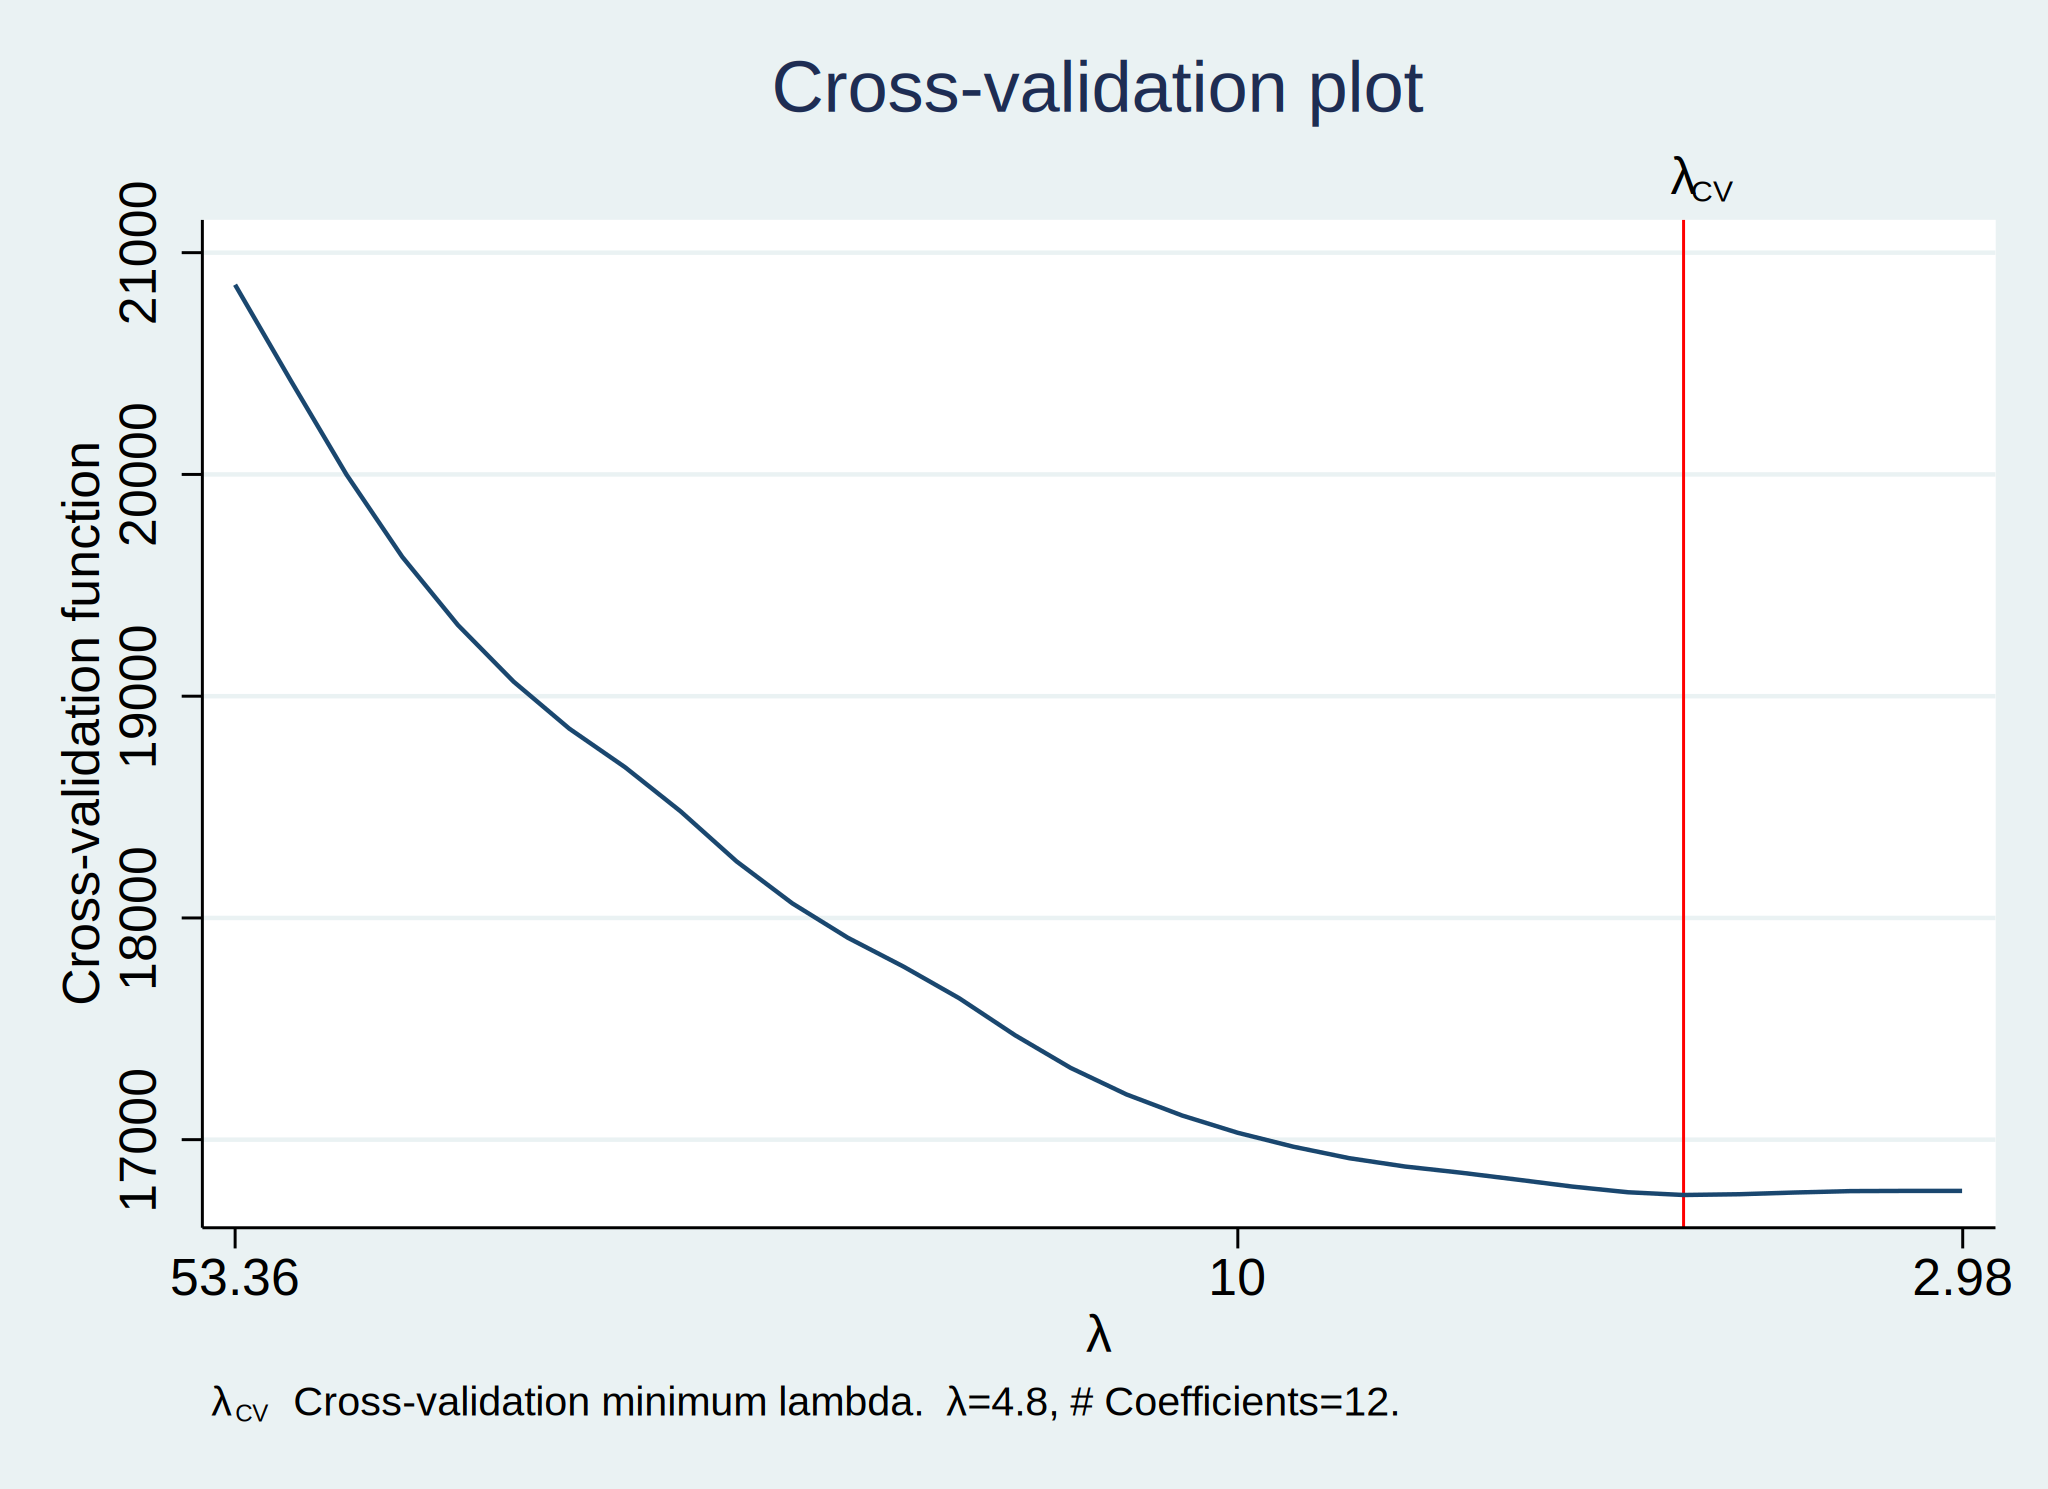

In [4]:
%%stata
lasso linear react no2_class $cc i.($fc), nolog folds(20) rseed(52)
estimates store cv
cvplot, minmax

In [5]:
%%stata
lasso linear react no2_class $cc i.($fc), nolog sel(cv,serule) folds(20) rseed(52)


Lasso linear model                          No. of obs        =      1,036
                                            No. of covariates =         33
Selection: Cross-validation one s.e. rule   No. of CV folds   =         20

--------------------------------------------------------------------------
         |                                No. of      Out-of-      CV mean
         |                               nonzero       sample   prediction
      ID |     Description      lambda     coef.    R-squared        error
---------+----------------------------------------------------------------
       1 |    first lambda    53.35969         0      -0.0008      20855.7
       2 |   lambda before    48.61936         2       0.0199     20423.25
     * 3 | selected lambda    44.30015         2       0.0403     19999.24
       4 |    lambda after    40.36465         2       0.0580     19628.57
      32 |     last lambda    2.983239        19       0.1953     16769.18
-----------------------

In [6]:
%%stata -eret steret
lasso linear react no2_class $cc i.($fc), nolog folds(20) rseed(52)


Lasso linear model                          No. of obs        =      1,036
                                            No. of covariates =         33
Selection: Cross-validation                 No. of CV folds   =         20

--------------------------------------------------------------------------
         |                                No. of      Out-of-      CV mean
         |                               nonzero       sample   prediction
      ID |     Description      lambda     coef.    R-squared        error
---------+----------------------------------------------------------------
       1 |    first lambda    53.35969         0      -0.0008      20855.7
      26 |   lambda before    5.213295        11       0.1956     16763.18
    * 27 | selected lambda     4.75016        12       0.1962     16750.66
      28 |    lambda after    4.328169        13       0.1960     16754.23
      32 |     last lambda    2.983239        19       0.1953     16769.18
-----------------------

Step 1

In [7]:
steret['e(allvars_sel)']

'no2_class age age0 siblings_young 0bn.sex 1bn.grade 3bn.grade 0bn.lbweight 1bn.meducation 2bn.meducation 2bn.feducation 4bn.feducation'

Step 2

In [8]:
steret['e(b_postselection)']

array([[   1.72979031,  -22.80612984,    6.31751872,   12.92707349,
         -48.70310792,   66.00195855,  -29.86744489,   18.85975766,
        -130.86278077,   25.52701653,   16.12541176,  -31.82910851,
         877.88369881]])